In [4]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [70]:
csv_files = [
    "convertcsv 1-100.csv",
    "convertcsv 101-140.csv"
]
dataframes = [pd.read_csv(file) for file in csv_files]
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()

,Unnamed: 0,Inhibitor,Mol._weight,SMILES,Metal,Alloy,Time_h,Temperature_K,pH,Inhib_Concentrat_M,Salt_Concentrat_M,Synergistic_Inhib_type,Synergistic_Inhib_M,Methodology,Reference,Efficiency
0,1,"1,2,4-Triazole",69.07,c1ncn[nH]1,Al,AA2024,24.0,298,10.0,0.001,0.1,NaN,0,Image processing,"Winkler, Corrosion Science 106 (2016) 229–235",90.0
1,2,"1,2,4-Triazole-3-thiol",101.13,Sc1n[nH]cn1,Al,AA2024,24.0,298,4.0,0.001,0.1,NaN,0,Image processing,"Winkler, Corrosion Science 106 (2016) 229–235",90.0
2,3,2-Mercaptoacetic acid,92.12,OC(=O)CS,Al,AA2024,672.0,298,7.0,0.001,0.1,NaN,0,Weight loss,"Harvey, Corrosion Science 53 (2011) 2184–2190",96.0
3,4,2-Mercaptobenzimidazole,150.20,Sc1nc2c([nH]1)cccc2,Al,AA2024,672.0,298,7.0,0.001,0.1,NaN,0,Weight loss,"Harvey, Corrosion Science 53 (2011) 2184–2190",90.0
4,5,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",167.25,S=c1sc2c([nH]1)cccc2,Al,AA2024,672.0,298,7.0,0.001,0.1,NaN,0,Weight loss,"Harvey, Corrosion Science 53 (2011) 2184–2190",95.0


In [92]:
# gather data for plot
# here temperature
temperature = combined_df["Temperature_K"]
efficiency = combined_df["Efficiency"]
Mol_weight = combined_df["Mol._weight"]

In [66]:
# Define the range
# Temperature automotive:	-30°C - 70°C	243K - 343K
# Temperature avionics:	-50°C - 120°C	223K - 393K

# Filter for avionic_dataset
avionic_dataset = combined_df[
    ((combined_df['Temperature_K'] >= 243) & (combined_df['Temperature_K'] <= 343))
]

# Filter for automotive_dataset
automotive_dataset = combined_df[
    ((combined_df['Temperature_K'] >= 223) & (combined_df['Temperature_K'] <= 393))
]
print(avionic_dataset.shape[0], automotive_dataset.shape[0])

140 140


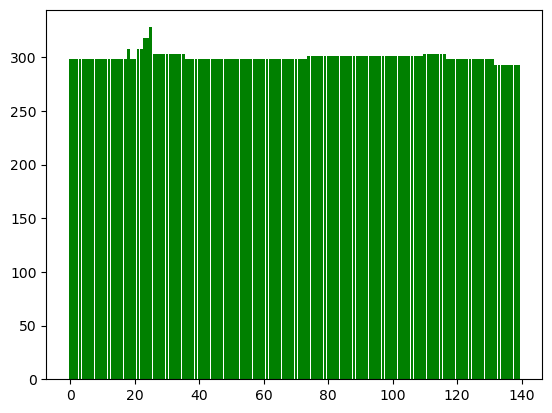

In [68]:
#plot - temperature
index = np.arange(len(temperature))
bar_width = 0.9
plt.bar(index, temperature, bar_width,  color="green")
plt.show()

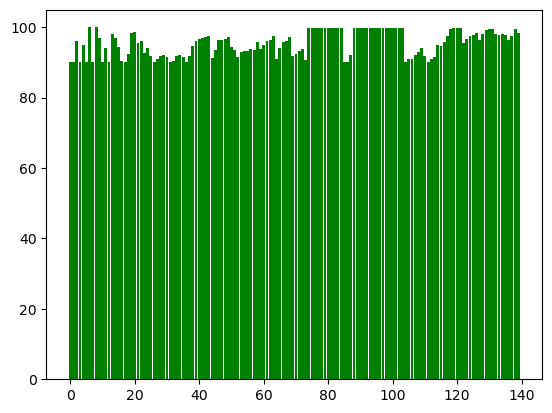

In [16]:
#plot - temperature
index = np.arange(len(efficiency))
bar_width = 0.9
plt.bar(index, efficiency, bar_width,  color="green")
plt.show()

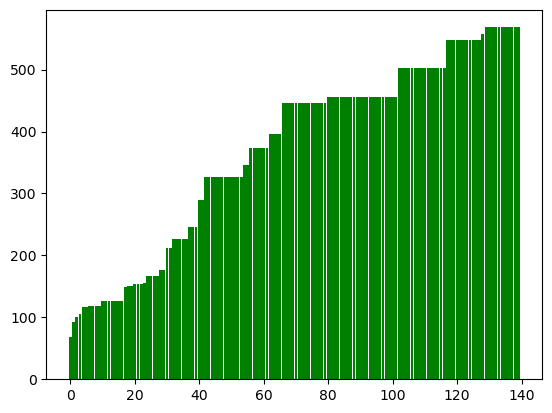

In [90]:
#plot - Mol_weight
Mol_weight = Mol_weight.sort_values()
index = np.arange(len(Mol_weight))
bar_width = 0.9
plt.bar(index, Mol_weight, bar_width,  color="green")
plt.show()

In [94]:
import datamol as dm

In [103]:
avionic_dataset["Mol"] = avionic_dataset["SMILES"].apply(dm.to_mol)

In [131]:
from rdkit import Chem
from rdkit.Chem import AllChem, AddHs

mol = Chem.MolFromSmiles("CO")
mol = AddHs(mol)
# print("Num: ",mol.GetNumAtoms())
mol = Chem.AddHs(mol,explicitOnly=True)
AllChem.EmbedMolecule(mol)
print(Chem.MolToXYZBlock(mol))
with open("molecule.xyz", "w") as file:
    file.write(Chem.MolToXYZBlock(mol))

6

C     -0.352745   -0.013384   -0.004582
O      0.953509   -0.262091   -0.386765
H     -0.498680    0.083405    1.076621
H     -0.964459   -0.864768   -0.379842
H     -0.764285    0.892663   -0.484474
H      1.626660    0.164175    0.179043



In [164]:
for idx, smile in combined_df["SMILES"].items():
    # print(idx, "\t", smile)
    mol = Chem.MolFromSmiles(smile)
    mol = AddHs(mol)
    # print("Num: ",mol.GetNumAtoms())
    mol = Chem.AddHs(mol,explicitOnly=True)
    AllChem.EmbedMolecule(mol)
    # print(Chem.MolToXYZBlock(mol))
    with open("./XYZ/"+str(idx)+".xyz", "w") as file:
        file.write(Chem.MolToXYZBlock(mol))

[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:52] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:52] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:53] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:53] UFFTYPER: Unrecognized atom type: Ce+3 (0)
[22:22:53] UFFTYPER: Unrecognized charge state for atom: 0
[22:22:53] UFFTYPER: Unrecognized ato

In [234]:
# Suppress PySCF warning...
import pyscf
# pyscf.__config__.B3LYP_WITH_VWN5 = False

In [236]:
from pathlib import Path
from pyscf.gto import Mole
from pyscf.lib import logger
from asf import ASFDMRG
from asf.visualization import draw_pair_information
from asf.preselection import MP2NatorbPreselection, MP2PairinfoPreselection
from asf.scf import stable_scf
from asf.utility import pictures_Jmol, show_mos_grid

In [242]:
mol = Mole(
    atom="XYZ/0.xyz",
    spin=0,
    charge=0,
    basis="def2-SVP",
    verbose=logger.NOTE,  # a less talkative option, to suppress printing of SCF iterations, etc.
).build()

In [244]:
mf = stable_scf(mol)

-> Initiating a UHF calculation.
converged SCF energy = -240.604291722576  <S^2> = 1.2627254e-08  2S+1 = 1
<class 'pyscf.scf.uhf.UHF'> wavefunction is stable in the internal stability analysis
-> The calculated SCF solution is converged and stable.


In [246]:
# If set to True, determine the initial active space using pair information derived from
# Moller-Plesset theory (more complicated procedure).
use_mp_pairinfo = True

if use_mp_pairinfo:
    pre = MP2PairinfoPreselection(mf)
    active_space_pt = pre.select()
# Otherwise, just use MP2 natural orbitals with a specific cutoff.
else:
    pre = MP2NatorbPreselection(mf, lower=0.02, upper=1.98)
    active_space_pt = pre.select()

print(active_space_pt)

ActiveSpace: 16 electrons in 16 orbitals
  active MO indices: [8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27]


In [247]:
sf = ASFDMRG(
    mol=mol,
    nel=active_space_pt.nel,
    mo_list=active_space_pt.mo_list,
    mo_coeff=active_space_pt.mo_coeff,
    maxM=2500,
)

In [248]:
sf.calculate()

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/Block/block.spin_adapted'

In [220]:
active_spaces = sf.find_many()

Exception: DMRG calculation must be performed first to calculate the density.